In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
fdir = '/Users/cosmology/radiometer/ReadoutApp/observation/'

In [3]:
import glob

In [4]:
fnames = glob.glob(fdir+'*.txt')

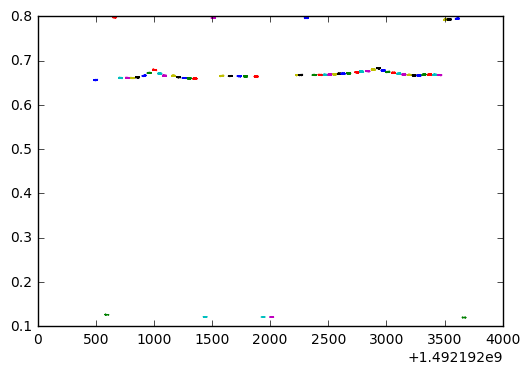

In [5]:
for f in fnames[:-18]:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [6]:
fnames13v = fnames[-18:]
fnames = fnames[:-18]

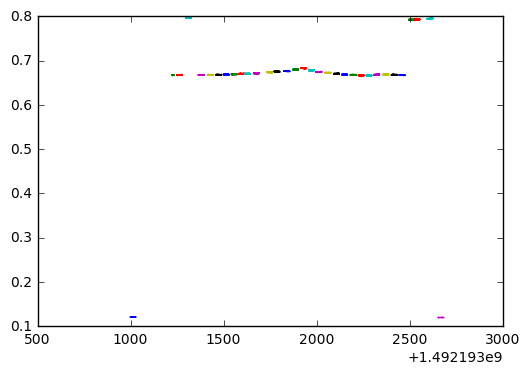

In [8]:
for f in fnames[25:]:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [9]:
newfiles = fnames[25:]

In [10]:
nitrofiles = []
datafiles = []
paddlefiles = []
for f in newfiles:
    x = np.loadtxt(f)
    avg = np.mean(x[:,1])
    if avg < 0.2:
        paddlefiles.append(f)
    elif avg < 0.73:
        datafiles.append(f)
    else:
        nitrofiles.append(f)

In [11]:
nitrofiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:24:55_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:44:54_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:45:24_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:46:34_Readout.txt']

In [12]:
paddlefiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:19:57_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:47:32_Readout.txt']

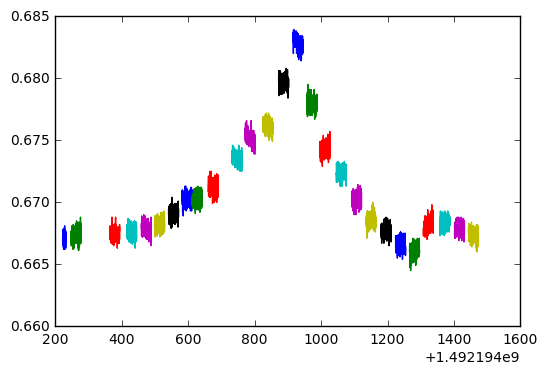

In [13]:
for f in datafiles:
    x = np.loadtxt(f)
    plot(x[:,0], x[:,1])

In [14]:
angles = np.array([0, 0, 5, 10, 15, 20, 25, 30, 30, 35, 40, 45, 50, 55, 60, 55, 50, 45, 40, 35, 30, 25, 20, 15, 10, 5, 0])

In [15]:
for f in datafiles:
    fl = open(f)
    for k in range(8):
        fl.readline()
        if k == 2:
            print fl.readline()

# Angle pointing (from vertical): 0

# Angle pointing (from vertical): 0

# Angle pointing (from vertical): 5

# Angle pointing (from vertical): 10

# Angle pointing (from vertical): 15

# Angle pointing (from vertical): 20

# Angle pointing (from vertical): 25

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 35

# Angle pointing (from vertical): 40

# Angle pointing (from vertical): 45

# Angle pointing (from vertical): 50

# Angle pointing (from vertical): 55

# Angle pointing (from vertical): 60

# Angle pointing (from vertical): 55

# Angle pointing (from vertical): 50

# Angle pointing (from vertical): 45

# Angle pointing (from vertical): 40

# Angle pointing (from vertical): 35

# Angle pointing (from vertical): 30

# Angle pointing (from vertical): 25

# Angle pointing (from vertical): 20

# Angle pointing (from vertical): 15

# Angle pointing (from vertical): 10

# Angle pointing (from vertical): 5

# Angle pointing

In [34]:
angles = np.arange(7) * 10
angles2 = np.arange(5) * 10

In [42]:
angles2 = np.concatenate([angles2, np.ones(1)*50])

In [46]:
angles2[6::-1]

array([ 50.,  40.,  40.,  30.,  20.,  10.,   0.])

In [47]:
angles

array([ 0, 10, 20, 30, 40, 50, 60])

In [48]:
angles = np.concatenate([angles, angles2[6::-1]])

In [16]:
angles

array([ 0,  0,  5, 10, 15, 20, 25, 30, 30, 35, 40, 45, 50, 55, 60, 55, 50,
       45, 40, 35, 30, 25, 20, 15, 10,  5,  0])

In [18]:
meandatas = []
stddevdatas = []
for f in datafiles:
    x = np.loadtxt(f)
    meandatas.append(np.mean(x[:,1]))
    stddevdatas.append(np.std(x[:,1]))
    


<Container object of 3 artists>

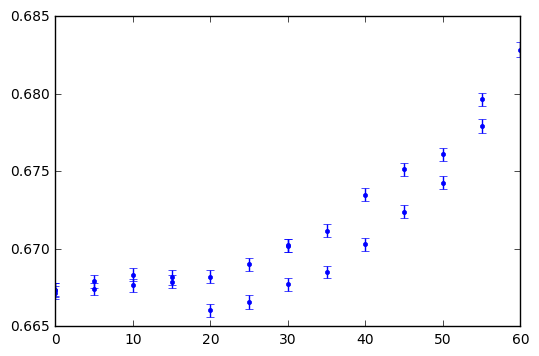

In [21]:
errorbar(angles, meandatas, yerr=stddevdatas, fmt='.')

In [22]:
radangles = angles * np.pi / 180.

<Container object of 3 artists>

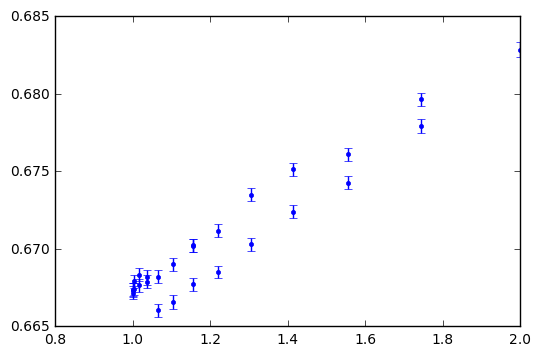

In [24]:
errorbar(1./np.cos(radangles), meandatas, yerr=stddevdatas ,fmt='.')

In [25]:
def line(x, m, b):
    return m*x + b

In [26]:
from scipy.optimize import curve_fit

In [27]:
x = 1./np.cos(radangles)
y = np.array(meandatas) + 0.0

In [31]:
popt = curve_fit(line, x, y, sigma=stddevdatas, absolute_sigma=True)

In [35]:
muncert= sqrt(popt[1][0,0])
buncert= sqrt(popt[1][1,1])


In [38]:
m = popt[0][0]
b = popt[0][1]

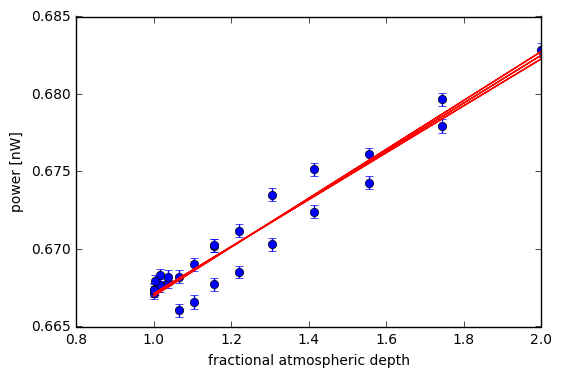

In [40]:
errorbar(x, y, yerr=stddevdatas,fmt='o')
plot(x, line(x, m,b), 'r')
plot(x, line(x, m+muncert,b-buncert), 'r')
plot(x, line(x, m-muncert,b+buncert), 'r')
xlabel('fractional atmospheric depth')
ylabel('power [nW]')

In [41]:
print b #nanoWatts

0.651600317043


In [63]:
xp = np.concatenate([np.zeros(1), x])

In [64]:
xp

array([ 0.        ,  1.        ,  1.01542661,  1.06417777,  1.15470054,
        1.30540729,  1.55572383,  2.        ,  1.55572383,  1.30540729,
        1.30540729,  1.15470054,  1.06417777,  1.01542661,  1.        ])

In [33]:
paddlefiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:19:57_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:47:32_Readout.txt']

In [34]:
nitrofiles

['/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:24:55_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:44:54_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:45:24_Readout.txt',
 '/Users/cosmology/radiometer/ReadoutApp/observation/2017-04-14_14:46:34_Readout.txt']

In [66]:
nitropower = []
nitroerr = []
for f in nitrofiles:
    x = np.loadtxt(f)
    nitropower.append(np.mean(x[:,1]))
    nitroerr.append(np.std(x[:,1]))

In [55]:
print nitropower
print nitroerr

[0.79604290540540534, 0.79214020270270269, 0.79250101351351354, 0.79446700336700338]
[0.00043583215430660773, 0.00046525054220250068, 0.00044717467393242646, 0.00050244061912452936]


In [57]:
paddlepower = []
paddletemps = []
paddlerr = []
temperr = []
for f in paddlefiles:
    x = np.loadtxt(f)
    paddlepower.append(np.mean(x[:,1])*10)
    paddletemps.append(np.mean(x[:,2]))
    paddlerr.append(np.std(x[:,1]*10))
    temperr.append(np.std(x[:,2]))
    

In [59]:
print paddlepower
print paddlerr
print paddletemps
print temperr

[1.2103108108108107, 1.1978547297297297]
[0.0010549199492580913, 0.0011281912371112126]
[298.48972972972973, 294.82905405405404]
[0.035162671122476695, 0.0041651445965968717]


<Container object of 3 artists>

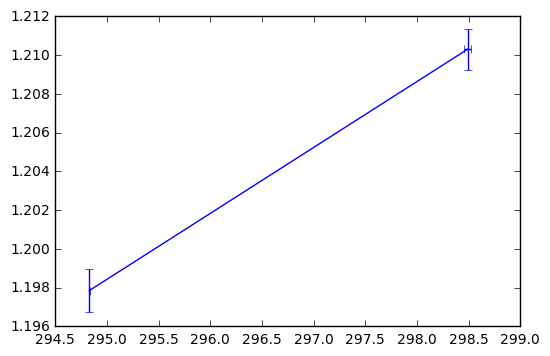

In [60]:
errorbar(paddletemps, paddlepower, yerr=paddlerr, xerr=temperr)

In [67]:
nitrotemps = [77.2, 77.2, 77.2, 77.2]
tempnitroerr = np.concatenate([temperr, temperr])
print tempnitroerr

[ 0.03516267  0.00416514  0.03516267  0.00416514]


<Container object of 3 artists>

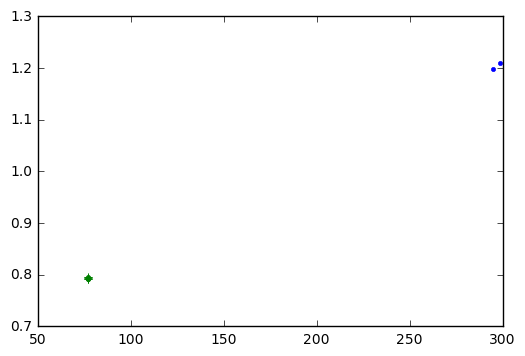

In [68]:
plot(paddletemps, paddlepower, '.')
errorbar(nitrotemps, nitropower, yerr=nitroerr ,xerr= tempnitroerr, fmt='.')

In [69]:
xc = np.concatenate([nitrotemps, paddletemps])

In [70]:
yc = np.concatenate([nitropower, paddlepower])

In [73]:
xerr= .5 *np.ones(6)
yerr = np.concatenate([nitroerr, paddlerr])

In [75]:
popt2 = curve_fit(line, yc, xc, sigma = xerr, absolute_sigma=True)

In [76]:
popt2

(array([ 534.77508505, -347.28331015]), array([[ 1.11337018, -1.03604972],
        [-1.03604972,  1.00576561]]))

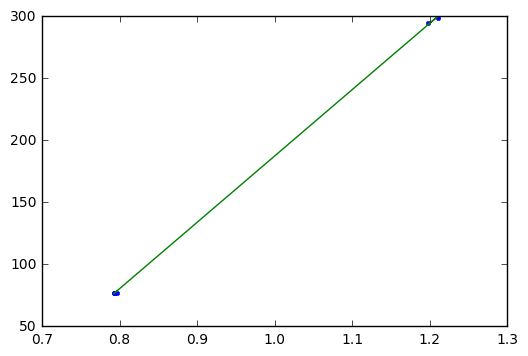

In [77]:
plot(yc, xc, '.')
plot(yc, line(yc, *popt2[0]))

In [78]:
line(b, *popt2[0])

1.1763048178122517

In [86]:
buncert
guncert= sqrt(popt2[1][0,0])
Tuncert= sqrt(popt2[1][1,1])

print guncert
print Tuncert

1.05516358071
1.00287866377


In [91]:
puncert = b*(popt2[0][0])*sqrt((buncert/b)**2+(guncert/popt2[0][0])**2)

In [92]:
totuncert = sqrt(puncert**2+Tuncert**2)

In [93]:
print totuncertb

1.23423169879


In [79]:
b


0.65160031704338661

In [137]:
yc2 = np.concatenate([np.ones(1)*cmbpower, yc])

In [138]:
yc2

array([ 0.77738717,  0.94649764,  0.94231481,  1.42336824,  1.40823986,
        1.42636486])